In [1]:
from pyspark.sql import SparkSession
import time
import matplotlib.pyplot as plt

In [5]:
spark = SparkSession.builder.appName("SPEEDTEST").getOrCreate()



files = [
    'gs://dataproc-staging-us-central1-100317476977-28dz6rb8/data/data_sample_50kb.csv',
    'gs://dataproc-staging-us-central1-100317476977-28dz6rb8/data/data_sample_100kb.csv',
    'gs://dataproc-staging-us-central1-100317476977-28dz6rb8/data/data_sample_250kb.csv',
    'gs://dataproc-staging-us-central1-100317476977-28dz6rb8/data/data_sample_500kb.csv',
    'gs://dataproc-staging-us-central1-100317476977-28dz6rb8/data/data_sample_1mb.csv'
]



In [8]:
times = []
for file in files:
    start = time.time()
    spark.catalog.clearCache()
    df = spark.read.csv(file, header=True, inferSchema=True)
    
    df.groupBy('category').avg('value').show()
    
    end = time.time()
    duration = round(end - start, 2)
    times.append(duration)
    print(duration, 's')

+--------+------------------+
|category|        avg(value)|
+--------+------------------+
|       D| 5129.409395033142|
|       B| 5033.371487308799|
|       C|4863.6012674862495|
|       A| 5109.666781894064|
+--------+------------------+

1.06 s
+--------+-----------------+
|category|       avg(value)|
+--------+-----------------+
|       D|5154.233510274384|
|       B|5031.588335941336|
|       C|4868.162232393298|
|       A|5019.711784956004|
+--------+-----------------+

0.99 s
+--------+-----------------+
|category|       avg(value)|
+--------+-----------------+
|       D|   4996.745687773|
|       B|4989.482087376662|
|       C|4948.414442445541|
|       A|4944.865335027468|
+--------+-----------------+

0.96 s
+--------+------------------+
|category|        avg(value)|
+--------+------------------+
|       D| 5105.247870115553|
|       B|4974.2059246157405|
|       C|  4928.88517054969|
|       A| 4972.186923545696|
+--------+------------------+

1.09 s
+--------+--------------

Text(0, 0.5, 'time taken')

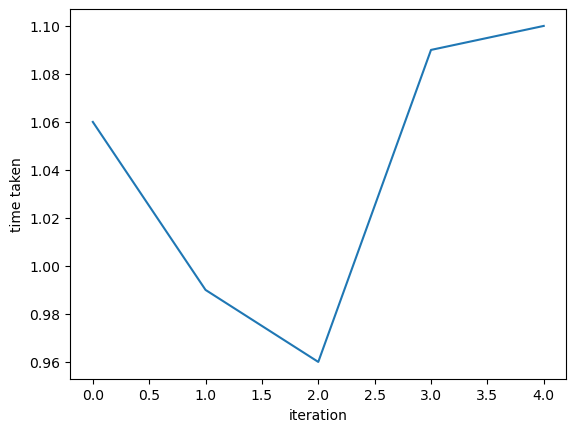

In [11]:
plt.plot(times)
plt.xlabel('iteration')
plt.ylabel('time taken')